In [94]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import FinanceDataReader as fdr


import requests
import pandas as pd


def stock_to_df(code):
    stock = code
    response = requests.get("https://m.stock.naver.com/api/item/getPriceDayList.nhn?code={}&pageSize=10000&page=1".format(stock))

    df_stock = pd.DataFrame(response.json()["result"]["list"])
    df_stock.index = pd.to_datetime(df_stock["dt"], format="%Y%m%d").reset_index(drop=True)
    df_stock = df_stock.sort_index().drop("dt", axis=1)
    print("{} done.".format(code), end="\t")
    return df_stock

def pool_crawl(stock_list):
    pool = Pool(processes=(cpu_count() - 1))
    results = pool.map(stock_to_df, stock_list)
    pool.close()
    pool.join()
    return results




kospi_info = pd.read_csv("./market_info/kospi.csv", index_col=0)
kosdaq_info = pd.read_csv("./market_info/kosdaq.csv", index_col=0)
date_info = pd.read_csv("./market_info/date_df.csv", index_col=0)["dt"]
date_info = pd.to_datetime(date_info, format="%Y%m%d").sort_values(ascending=True).reset_index(drop=True)

kospi_list = fdr.StockListing("KOSPI")["Symbol"]
kosdaq_list = fdr.StockListing("KOSDAQ")["Symbol"]

df_kospi = pool_crawl(kospi_list)
df_kosdaq = pool_crawl(kosdaq_list)

df_open_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_close_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_high_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_low_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_rtn_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_vol_kospi = pd.DataFrame(columns=kospi_list, index=date_info)


df_open_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_close_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_high_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_low_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_rtn_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_vol_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)

for x, y in zip(df_kospi, kospi_list):
    df_open_kospi[y] = x["ov"]
    df_close_kospi[y] = x["ncv"]
    df_high_kospi[y] = x["hv"]
    df_low_kospi[y] = x["lv"]
    df_rtn_kospi[y] = x["cr"] / 100
    df_vol_kospi[y] = x["aq"]

for x, y in zip(df_kosdaq, kosdaq_list):
    df_open_kosdaq[y] = x["ov"]
    df_close_kosdaq[y] = x["ncv"]
    df_high_kosdaq[y] = x["hv"]
    df_low_kosdaq[y] = x["lv"]
    df_rtn_kosdaq[y] = x["cr"] / 100
    df_vol_kospi[y] = x["aq"]

002320 done.	009460 done.	027390 done.	000720 done.	267270 done.	012330 done.	004560 done.	057050 done.	111110 done.	008770 done.	298040 done.	027410 done.	138930 done.	000590 done.	114090 done.	006360 done.	105560 done.	034220 done.	003300 done.	051600 done.	101530 done.	001450 done.	241590 done.	006060 done.	000850 done.	016580 done.	298020 done.	001040 done.	037560 done.	012630 done.	294870 done.	025000 done.	000040 done.	001120 done.	023150 done.	010950 done.	099350 done.	293480 done.	003350 done.	002390 done.	010420 done.	130660 done.	180640 done.	009830 done.	017800 done.	004020 done.	068400 done.	282330 done.	097950 done.	016610 done.	139130 done.	017940 done.	078930 done.	089470 done.	032560 done.	298050 done.	093370 done.	005010 done.	069260 done.	006840 done.	155660 done.	001250 done.	175330 done.	001060 done.	119650 done.	030210 done.	058850 done.	051900 done.	034310 done.	004060 done.	009160 done.	018670 done.	023000 done.	001880 done.	021050 done.	004360 done.	004490 done.

138490 done.	020120 done.	003240 done.	004100 done.	039130 done.	036460 done.	006200 done.	002300 done.	023350 done.	000970 done.	104700 done.	168490 done.	060980 done.	128940 done.	105630 done.	009180 done.	300720 done.	002220 done.	026960 done.	028100 done.	006040 done.	003160 done.	013570 done.	007340 done.	026890 done.	088980 done.	015540 done.	090370 done.	017180 done.	009680 done.	134380 done.	096300 done.	005180 done.	018260 done.	010140 done.	016360 done.	092220 done.	001940 done.	092230 done.	003550 done.	229640 done.	181710 done.	100840 done.	003570 done.	036530 done.	006120 done.	096770 done.	005610 done.	002710 done.	012320 done.	013580 done.	001140 done.	074610 done.	005720 done.	092780 done.	014820 done.	000150 done.	011160 done.	025560 done.	003610 done.	006090 done.	006110 done.	145990 done.	010960 done.	001820 done.	000390 done.	075180 done.	014910 done.	001430 done.	003030 done.	029530 done.	004170 done.	003220 done.	002880 done.	005880 done.	001620 done.	023450 done.

196170 done.	085810 done.	131400 done.	121890 done.	112240 done.	160600 done.	263920 done.	096630 done.	098660 done.	176440 done.	021080 done.	089970 done.	064510 done.	230360 done.	036810 done.	205100 done.	061970 done.	138690 done.	090740 done.	007530 done.	045060 done.	048260 done.	138080 done.	049480 done.	153710 done.	019210 done.	014190 done.	008290 done.	095270 done.	065950 done.	036090 done.	037440 done.	241520 done.	254120 done.	264850 done.	276920 done.	036120 done.	099220 done.	307070 done.	057500 done.	036490 done.	079940 done.	039240 done.	121440 done.	267320 done.	043650 done.	204620 done.	019660 done.	091970 done.	051490 done.	242040 done.	138610 done.	007390 done.	033640 done.	144510 done.	036480 done.	303030 done.	108380 done.	065690 done.	140520 done.	131220 done.	090410 done.	204990 done.	092300 done.	064240 done.	126640 done.	290270 done.	024060 done.	238490 done.	245620 done.	079190 done.	900290 done.	067290 done.	035900 done.	218410 done.	255220 done.	246690 done.

In [95]:
import requests
import FinanceDataReader as fdr
from bs4 import BeautifulSoup

listings = fdr.StockListing("KRX")

pages = range(1, 22)
kospi_200 = list()
for x in pages:
    url = "http://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(x)
    result = requests.get(url)
    soup = BeautifulSoup(result.text, "lxml")
    items = soup.find_all("td", {"class": "ctg"})
    for item in items:
        kospi_200.append(item.text)
kospi_200 = set(kospi_200)
kospi_200_codes = listings[listings["Name"].isin(kospi_200)]["Symbol"].astype("str").reset_index(drop=True)

kospi_200_codes.to_csv("./kospi_200_list/kospi_200_list.csv")

In [102]:
len(kospi_200)

201

In [ ]:
from sklear.decomposition import PCA

In [202]:
df_kospi_200 = df_rtn_kospi[kospi_200_codes]
df_kospi_200_otoc = df_close_kospi / df_open_kospi - 1
df_kospi_200_otoc = df_kospi_200_otoc.loc["2009-01-01":, kospi_200_codes]

In [212]:
df_kospi_200_otoc = df_kospi_200_otoc[np.isfinite(df_kospi_200_otoc)]

In [631]:
from sklearn.decomposition import PCA

df_kospi_test = df_kospi_200.loc["2009-01-01":]
test_period = df_kospi_test.index[df_kospi_test.index > "2010-01-01"]
df_weights = pd.DataFrame(columns=df_kospi_test.columns, index=df_kospi_test.index)
target_month_prev = 0
window = 252
for x in range(window, df_kospi_test.shape[0]):
    target_df = df_kospi_test.iloc[x-window:x].dropna(how="all", axis=1).fillna(0)
    target_columns = target_df.columns
    target_date = target_df.index[-1]
    target_month = target_date.month
#     if target_month != target_month_prev:
    pca = PCA(n_components=10)
    df_transform = pca.fit_transform(target_df)
    df_transform = pca.inverse_transform(df_transform)
    df_weights.loc[target_date, target_columns] = df_transform[-1]
    target_month_prev = target_date.month
    if x % 100 == 0:
        print(x)

300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [632]:
df_transform[-1].shape

(186,)

In [663]:
df_alpha = (df_kospi_test - df_weights)
df_alpha = df_weights.loc["2010-01-01":]
# df_alpha = df_alpha.add(abs(df_alpha.min(axis=1)), axis=0)
df_alpha = df_alpha.rank(axis=1)
# df_alpha = df_alpha.divide(df_alpha.sum(axis=1), axis=0)
df_alpha = df_alpha.sub(df_alpha.mean(axis=1), axis=0)
df_alpha = df_alpha.div(df_alpha.abs().sum(axis=1), axis=0)
df_alpha = df_alpha.ffill()
df_alpha = df_alpha.shift(1)

In [664]:
print(df_alpha.iloc[-1].nlargest(20).index)
print(df_alpha.iloc[-1].nsmallest(20).index)

Index(['000720', '064350', '025860', '006360', '052690', '042670', '001230',
       '008770', '004020', '005940', '047040', '003300', '004170', '071050',
       '010120', '192820', '006260', '000210', '034020', '001520'],
      dtype='object', name='Symbol')
Index(['073240', '079550', '282330', '019680', '047810', '007070', '012450',
       '032640', '316140', '000240', '064960', '009240', '097230', '017670',
       '002960', '192400', '161390', '026960', '060980', '057050'],
      dtype='object', name='Symbol')


In [665]:
df_alpha = df_alpha.rolling(5).mean()

-1697966.409923698
3496359.7378073544
-0.4856383602530931


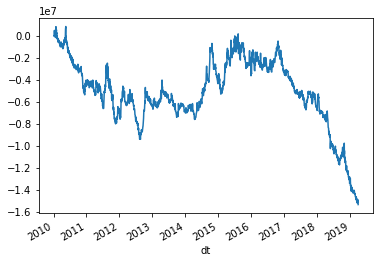

In [666]:
pnl = (df_alpha*100000000).multiply(df_kospi_test.loc["2010-01-01":])
pnl[pnl > 0] = pnl[pnl > 0] * 0.997
pnl[pnl < 0] = pnl[pnl < 0] * 1.003
cum_pnl = (pnl.sum(axis=1)).cumsum()
ann_rtn = cum_pnl.diff().mean() * 252
ann_std = cum_pnl.diff().std() * (252 ** 0.5)
print(ann_rtn)
print(ann_std)
print(ann_rtn/ann_std)
cum_pnl.plot()

0.15011610296299466
0.26468710034455734
0.5671455192473699


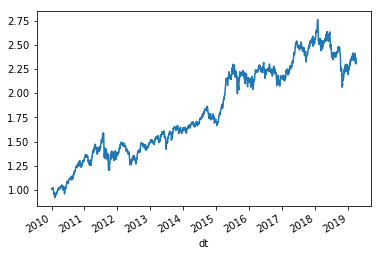

In [653]:
cum_pnl = (df_kospi_test.mean(axis=1)["2010-01-01":]+1).cumprod()
ann_rtn = cum_pnl.diff().mean() * 252
ann_std = cum_pnl.diff().std() * (252 ** 0.5)
print(ann_rtn)
print(ann_std)
print(ann_rtn/ann_std)
cum_pnl.plot()